## Import Libraries

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
import re
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Import Text

In [2]:
# import text file
with open('20th_century_wiki.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [3]:
# import countries text file
path = 'C:/Users/steve/20th-century'
countries_df = pd.read_csv(os.path.join(path, 'countries_list_20th_century.csv'))

## Text Mining

### Tokenization

In [4]:
# sentence tokenization
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)         1.1.2 Russian Revolution and communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise

In [5]:
# word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2', 'Russian', 

**Find Most Frequent Words**

In [6]:
# word frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4803 samples and 21885 outcomes>


In [7]:
# show top 10 most common words
common_words = dist_words.most_common(10)
common_words

[('.', 1561),
 ('the', 1106),
 (',', 963),
 ('of', 615),
 ('and', 402),
 ('to', 326),
 ('The', 319),
 ('[', 300),
 (']', 300),
 ('in', 296)]

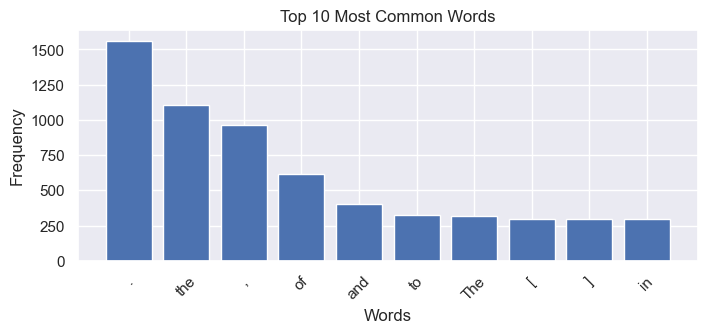

In [8]:
words, frequencies = zip(*common_words)
plt.figure(figsize=(8, 3))
plt.bar(words, frequencies)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Remove Stop Words**

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
# removing stopwords
filtered_words = []
for word in tokenized_word:
      if word not in stop_words:
           filtered_words.append(word)

In [12]:
# create new FreqDist for filtered words
dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4700 samples and 17192 outcomes>


In [13]:
# show top 10 most common filtered words
common_filter_words = dist_words_filter.most_common(10)
common_filter_words

[('.', 1561),
 (',', 963),
 ('The', 319),
 ('[', 300),
 (']', 300),
 ("''", 272),
 ('``', 268),
 ('^', 266),
 ('(', 242),
 (')', 242)]

In [14]:
# remove common punctuation marks so not included in count
# substitue all punction marks with a space
sans_punc = re.sub("[^a-zA-Z]", #search for all non-letters
                   " ", #replace them with a space
                   str(filtered_words))

In [15]:
# create another tokenized object so the FreqDist function doesn't only provide you with single letters
tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation

In [16]:
# create new FreqDist
dist_words_filter_2 = FreqDist(tokenized_word_2)

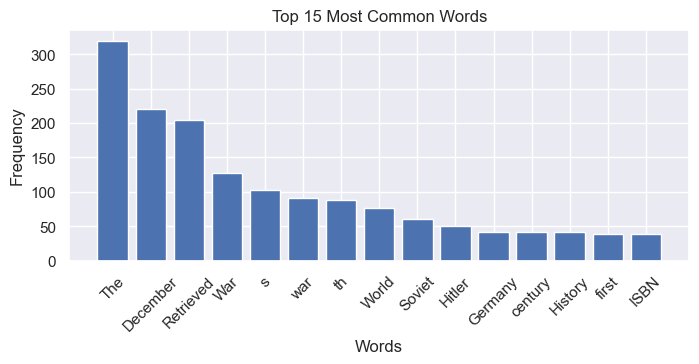

In [17]:
# list common words
common_words_filter_2 = dist_words_filter_2.most_common(15)
words, frequencies = zip(*common_words_filter_2)
# plot common words
plt.figure(figsize=(8, 3))
plt.bar(words, frequencies)
plt.title('Top 15 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Insights**: The significant words include December, War, Soviet, Hitler, & Germany which highlight main events, WWII and the Cold War. 

Seeing ISBN in the top 15 was insightful because it is a reminder than the 'References' section is included in the text being analysized, not just the main aritcle section. There are 266 references.

### POS Tagging

In [18]:
# remove a few more words and letters by adding them to the list
new_stopwords = ["The", "s", "th", "p", "S"]

filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [19]:
%%time
# make one big string out of the list filtered and pass it to the TextBlob() function
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 11 ms


In [20]:
tags_list = text.tags
tags_list

# lesson's code does not work again -- error message indicates downloading the below
#running this a second time which is why error message is no longer showing

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'accoun

In [21]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [22]:
# tags each word with its part of speech i.e. noun, adjective, etc
tags_list = text.tags
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'accoun

In [23]:
# create df of info
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top20=df_t.nlargest(20, 'Words')

df_text.head(5)

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


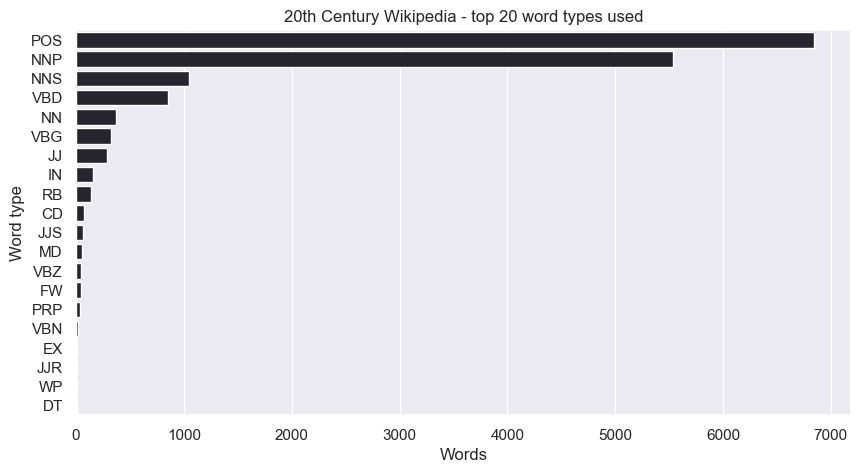

In [24]:
# create bar plot of each part of speech group
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top20).set_title("20th Century Wikipedia - top 20 word types used")

**Insights**: Top 3 are: 
1. **POS**: Possessive Endings *(indicate possession or ownership)*
2. **NNP**: Proper Nouns *(names for individuals, places, organizations, or events)*
3. **NNS**: Plural Nouns

**Top 15 -- NOUNS --**

In [25]:
# looking for singular nouns (NN), plural nouns (NNS), and proper nouns (NNP)
df_nouns = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df_nouns.columns = ["Word", "Occurrences"]
x = df_nouns.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15_nouns = y.nlargest(15, 'Occurrences') 

Text(0.5, 1.0, '20th Century Wikipedia - most frequently used nouns')

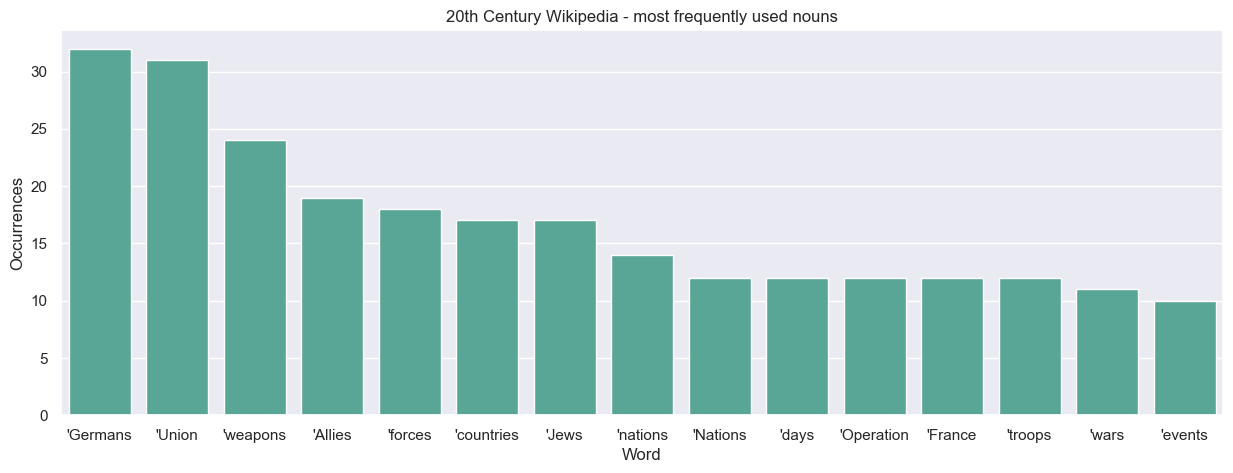

In [26]:
# create bar plot
plt.figure(figsize=(15, 5))
sns.set_palette("dark:#5A9_r") 
sns.barplot(x="Word", y="Occurrences", saturation=0.9, data=top15_nouns).set_title("20th Century Wikipedia - most frequently used nouns")

**Insights:** As indicated by the intial top 10 words, the most frequent nouns point to the two main events spanning the 20th century: WWII and the Cold War. The most common nouns include the names of countries involved, as well as war-associated words such as 'weapons', 'forces', 'troops', etc.

**Top 15 -- ADJECTIVES --**

In [27]:
# looking for adjective (JJ), comparative adjective (JJR), and superlative adjective (JJS)
df_adj = df_text[(df_text['Word type'] == "JJ") | (df_text['Word type'] == "JJR") | (df_text['Word type'] == "JJS")]
df_adj.columns = ["Word", "Occurrences"]
x = df_adj.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15_adj = y.nlargest(15, 'Occurrences') 

Text(0.5, 1.0, '20th Century Wikipedia - most frequently used adjectives')

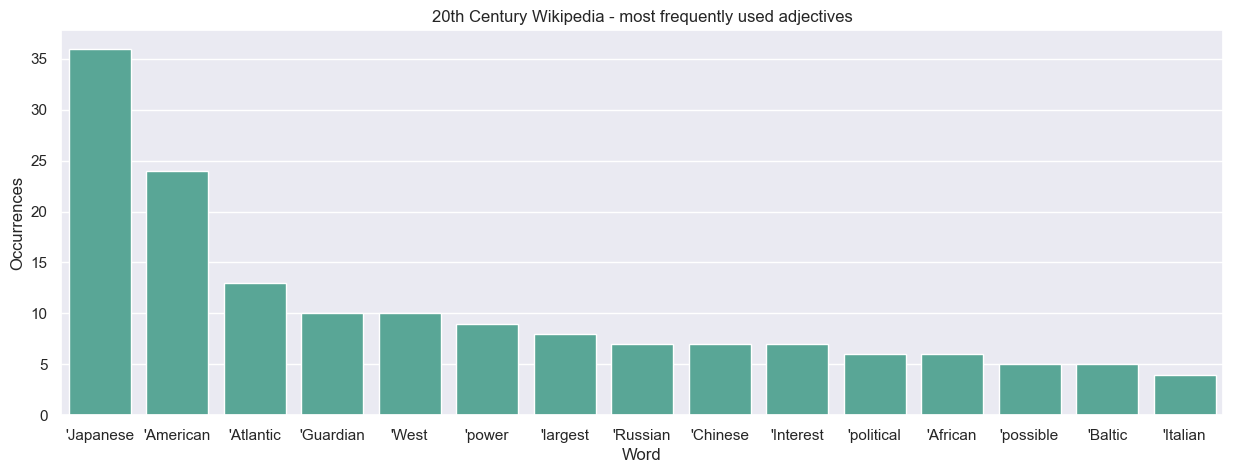

In [28]:
# create bar plot
plt.figure(figsize=(15, 5))
sns.set_palette("dark:#5A9_r") 
sns.barplot(x="Word", y="Occurrences", saturation=0.9, data=top15_adj).set_title("20th Century Wikipedia - most frequently used adjectives")

**Insights:** Most of the top adjectives indicate a country, or other, geographic ('Atlantic', 'West', etc) description. Non-geographic adjectives in the top 15 include 'power', 'largest', 'interest', 'political', 'possible' - each of which could be used to describe a country's position in the global political and strategic landscape.

**Top 15 -- VERBS --**

In [29]:
# looking for base form verb (VB), past tense verb (VBD), present participle (VBG), past participle (VBN),
# non-3rd singular present (VBP), 3rd person singular present (VBZ)
verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"] # list of verb tags
df_verbs = df_text[df_text['Word type'].isin(verb_tags)] # store if word type is in verb_tags
df_verbs.columns = ["Word", "Occurrences"]
x = df_verbs.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15_verbs = y.nlargest(15, 'Occurrences') 

Text(0.5, 1.0, '20th Century Wikipedia - most frequently used verbs')

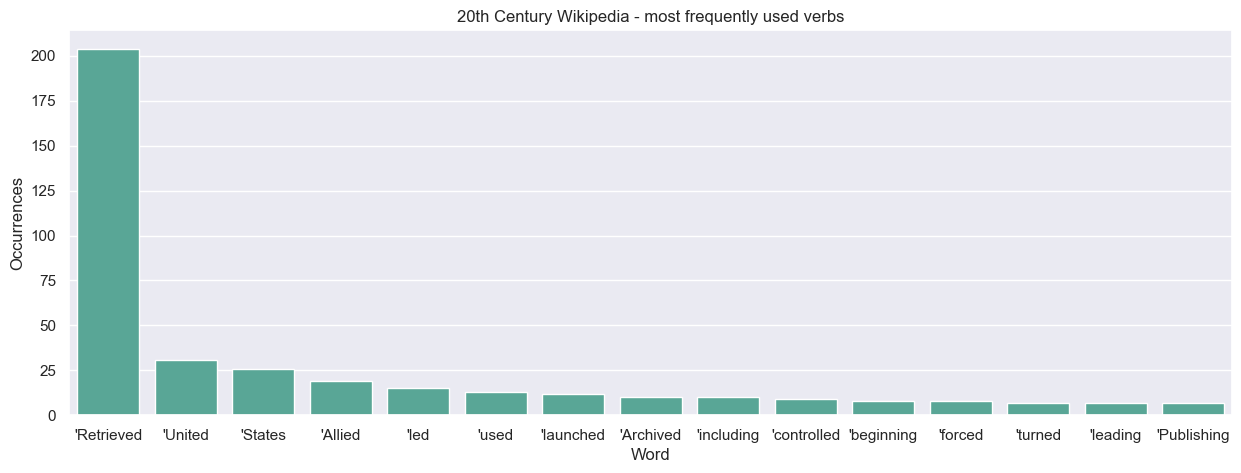

In [30]:
# create bar plot
plt.figure(figsize=(15, 5))
sns.set_palette("dark:#5A9_r") 
sns.barplot(x="Word", y="Occurrences", saturation=0.9, data=top15_verbs).set_title("20th Century Wikipedia - most frequently used verbs")

**Insights:** 'United' and 'States' are most likely incorrectly labeled as verbs and should instead be listed as a singular unit 'United States' under proper nouns.  
The top verbs, like the top adjectives, indicate policital and strategic actions such as 'launched', 'allied', 'led', 'controlled', etc.

### Countries List

In [31]:
countries_df.head(5)

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [32]:
countries_df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
countries_df.head()

,country_name
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [34]:
text

TextBlob("['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'century', 'Toggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days

In [35]:
# make text lower case
text_lower = str(text).lower()

# import countries list and make all lower case
countries_df = pd.read_csv("countries_list_20th_century.csv")
countries = countries_df['country_name'].str.lower().tolist()

In [36]:
countries

# there are extra spaces in the countries list, need to remove them

[' afghanistan ',
 '  albania ',
 '  algeria ',
 '  andorra ',
 '  angola ',
 '  antigua and barbuda ',
 '  argentina ',
 '  armenia ',
 '  australia ',
 '  austria ',
 '  azerbaijan',
 ' bahamas, the ',
 '  bahrain ',
 '  bangladesh ',
 '  barbados ',
 '  belarus ',
 '  belgium ',
 '  belize ',
 '  benin ',
 '  bhutan ',
 '  bolivia ',
 '  bosnia and herzegovina ',
 '  botswana ',
 '  brazil ',
 '  brunei ',
 '  bulgaria ',
 '  burkina faso ',
 '  burundi',
 ' cambodia ',
 '  cameroon ',
 '  canada ',
 '  cape verde ',
 '  central african republic ',
 '  chad ',
 '  chile ',
 "  china, people's republic of ",
 '  colombia ',
 '  comoros ',
 '  congo, democratic republic of the ',
 '  congo, republic of the ',
 '  costa rica ',
 '  croatia ',
 '  cuba ',
 '  cyprus ',
 '  czech republic',
 '  denmark ',
 '   djibouti ',
 '   dominica ',
 '   dominican republic',
 '  east timor ',
 '   ecuador ',
 '   egypt ',
 '   el salvador ',
 '   equatorial guinea ',
 '   eritrea ',
 '   estonia ',

In [37]:
# remove extra spaces from countries
countries = countries_df['country_name'].str.strip().str.lower().tolist()

In [38]:
from collections import Counter
country_counts = Counter()

# country counter
for country in countries:
    count = text_lower.count(country)
    country_counts[country] = count

In [39]:
# put in df
country_freq_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Mentions'])
country_freq_df = country_freq_df.sort_values(by='Mentions', ascending=False)

In [40]:
country_freq_df

,Country,Mentions
85,japan,69
64,germany,42
144,russia,18
60,france,17
191,vietnam,16
...,...,...
83,ivory coast,0
84,jamaica,0
86,jordan,0
87,kazakhstan,0


In [41]:
country_freq_df.head(20)

,Country,Mentions
85,japan,69
64,germany,42
144,russia,18
60,france,17
191,vietnam,16
82,italy,14
140,poland,13
76,india,12
42,cuba,9
8,australia,6


In [42]:
country_freq_df['Mentions'].value_counts()

Mentions
0     145
1      25
2       8
4       7
3       7
5       6
69      1
42      1
18      1
17      1
16      1
14      1
13      1
12      1
9       1
6       1
Name: count, dtype: int64

Text(0.5, 1.0, '20th Century Wikipedia - country mention counts')

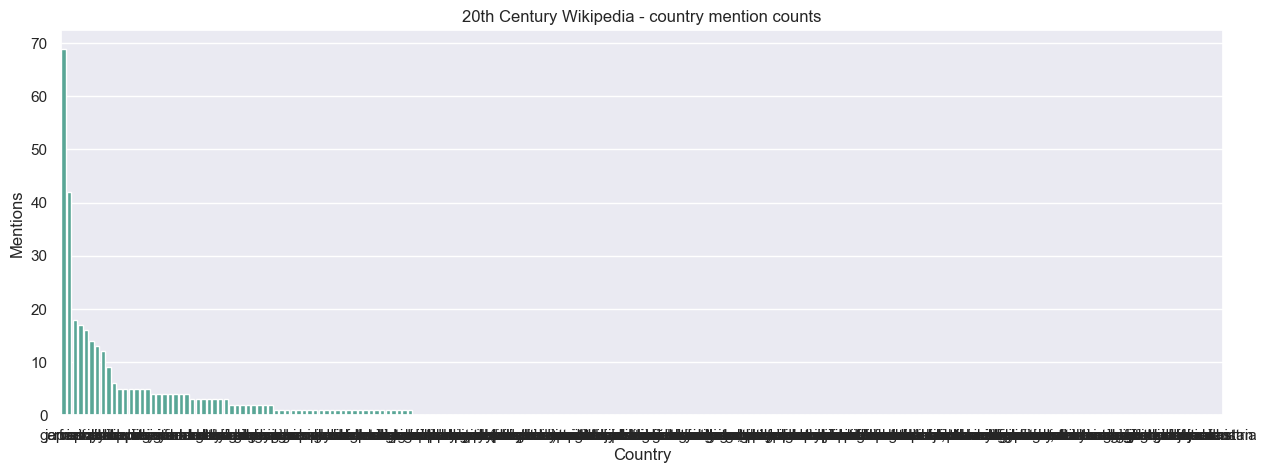

In [43]:
# create bar plot
plt.figure(figsize=(15, 5))
sns.set_palette("dark:#5A9_r") 
sns.barplot(x="Country", y="Mentions", saturation=0.9, data=country_freq_df).set_title("20th Century Wikipedia - country mention counts")

In [44]:
# create new df for only country that have a Mention count > 0
countries_mentioned = country_freq_df[country_freq_df['Mentions'] > 0]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62],
 [Text(0, 0, 'japan'),
  Text(1, 0, 'germany'),
  Text(2, 0, 'russia'),
  Text(3, 0, 'france'),
  Text(4, 0, 'vietnam'),
  Text(5, 0, 'italy'),
  Text(6, 0, 'poland'),
  Text(7, 0, 'india'),
  Text(8, 0, 'cuba'),
  Text(9, 0, 'australia'),
  Text(10, 0, 'lithuania'),
  Text(11, 0, 'philippines'),
  Text(12, 0, 'slovakia'),
  Text(13, 0, 'austria'),
  Text(14, 0, 'norway'),
  Text(15, 0, 'libya'),
  Text(16, 0, 'pakistan'),
  Text(17, 0, 'oman'),
  Text(18, 0, 'guinea'),
  Text(19, 0, 'iran'),
  Text(20, 0, 'greece'),
  Text(21, 0, 'israel'),
  Text(22, 0, 'finland'),
  Text(23, 0, 'cambodia'),
  Text(24, 0, 'hungary'),
  Te

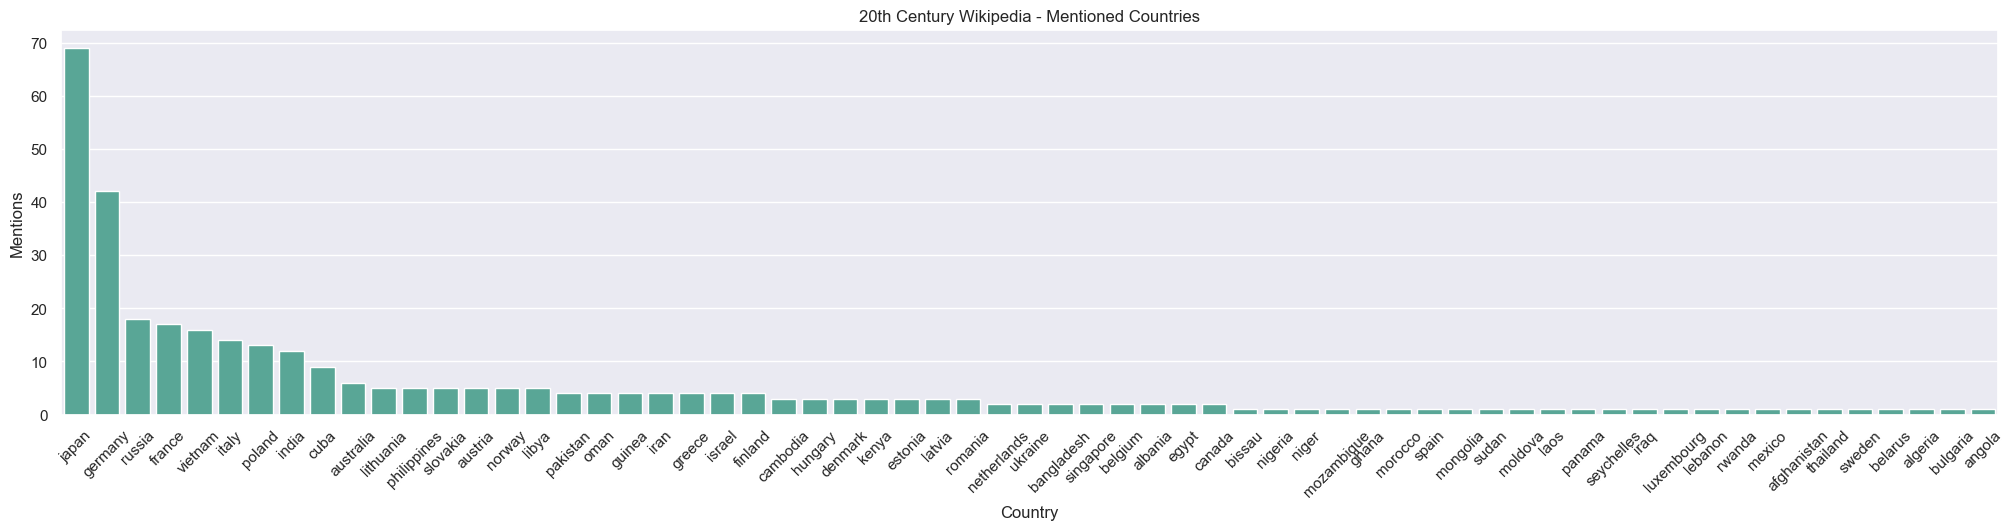

In [45]:
# create bar plot - For only countries mentioned
plt.figure(figsize=(25, 5))
sns.set_palette("dark:#5A9_r") 
sns.barplot(x="Country", y="Mentions", saturation=0.9, data=countries_mentioned).set_title("20th Century Wikipedia - Mentioned Countries")
# Rotate x-axis labels
plt.xticks(rotation=45)

**Insight**: Countries most involved in the main events have higher counts. The Unites States or any country with more than one word would not be accurately represented in this graph.